# Sentiment Analysis on IMDB Movie Review dataset

Note: If you are using the Google Colab and want to use tensorflow < 2: you will have to downgrade using this link. https://colab.research.google.com/notebooks/tensorflow_version.ipynb

Sentiment analysis is one of the key areas of research in NLP and Sequence modelling. We will be using LSTMs and Bi-directional LSTMs to predict two classes - positive or negative sentiment.


You will be reading the dataset from here: https://drive.google.com/file/d/127PCwycL0oToSF6l-c2oFuBkacYsmlgK/view?usp=sharing

You can use this blog for understanding: https://towardsdatascience.com/word-embeddings-for-sentiment-analysis-65f42ea5d26e

In [2]:
import re
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Conv1D, Dropout, Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

# !pip install wordcloud==1.4.1 --yes
from wordcloud import WordCloud, STOPWORDS

print('Libraries Imported')

Libraries Imported


All the relevant libraries are imported. 
You are free to change as you please. 
Using the GPU backend is recommended as LSTMs are computationally expensive to train.



## Data handling - exploration and cleaning





1.   You are expected to read the dataset into a dataframe.
2.   This is a real world dataset and you will be expected to clean the dataset.

1.   This includes removing trailing spaces and HTML tags.






In [3]:
from google.colab import drive
import os

drive.mount('/content/drive')
dir = "/content/drive/My Drive/Datasets/"
files = os.listdir(dir)

Mounted at /content/drive


In [4]:
df = pd.read_csv(dir + 'IMDB Dataset.csv')
Categorical_to_Numeric = {'sentiment':     {'positive': 1, 'negative': 0}}
df.replace(Categorical_to_Numeric, inplace=True)
print(len(df))
df.head(11)

50000


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


### Data Cleaning - write the techniques you employed and the achieved results

In [6]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
len(stop_words)

179

In [7]:
# WRITE CODE HERE
word_list = []
word_length = []
sentence_list = []
for i in range(len(df)):
  text = re.sub(r'\b\w{1,3}\b', '', df.iloc[i]['review'])
  words = (re.sub('[^A-Za-z\s]+',' ', text)).lower().split()
  sentence = ""
  for w in words:
    if w in stop_words:
      continue
    else:
      sentence += w + ' '
  sentence_list.append(sentence)
  word_length.append(len(words))
  word_list += words
df['Updated_Reviews'] = pd.Series(sentence_list)
len(word_list)

6657479

In [8]:
df.head(11)

,review,sentiment,Updated_Reviews
0,One of the other reviewers has mentioned that ...,1,reviewers mentioned watching episode hooked ri...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful spend time summer weekend si...
3,Basically there's a family where a little boy ...,0,basically family little jake thinks zombie clo...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...
5,"Probably my all-time favorite movie, a story o...",1,probably time favorite movie story selflessnes...
6,I sure would like to see a resurrection of a u...,1,sure would like resurrection dated seahunt ser...
7,"This show was an amazing, fresh & innovative i...",0,show amazing fresh innovative idea first aired...
8,Encouraged by the positive comments about this...,0,encouraged positive comments film looking forw...
9,If you like original gut wrenching laughter yo...,1,like original wrenching laughter like movie yo...


**Write about the techniques used to clean:**

1) I used Regular Expressions to get rid of all characters except proper words with alphabets in them only

2) I removed all the words whose length was below 3 cause either they were stop words or were HTML tags.

3) I got rid of all the stop words using the NLTK library which were 179 in total

### Test Train Split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(df['Updated_Reviews'].values, df['sentiment'].values, test_size=0.3, random_state=42)
print('Training Data: ',len(X_train))
print('Training Data: ',len(Y_train))
print('Testing Data: ',len(X_test))
print('Testing Data: ',len(Y_test))

Training Data:  35000
Training Data:  35000
Testing Data:  15000
Testing Data:  15000


### Data Exploration



1.   You are required to report the total number of distinct tokens present in the data set.
2.   Find out the minimum and max length of a review.

An integral part of visualization when it comes to textual data is the generating of a word cloud.

1.   
This task is open-ended and you can use any library of your choice. 
NLTK is one such library. 
2.   
Make sure to keep note of stop words.

##Example:


![alt text](https://getthematic.com/wp-content/uploads/2018/03/Harris-Word-Cloud-e1522406279125.png)




https://matplotlib.org/tutorials/colors/colormaps.html

In [0]:
comment = ""
for w in word_list:
  comment += w + ' '
comment

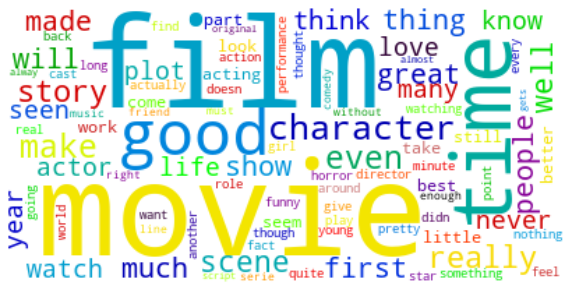

In [11]:
#WRITE CODE HERE
stopwords = set(STOPWORDS)

cloud = WordCloud(
    background_color='white',
    max_words=2000,
    collocations=False,
    colormap="nipy_spectral",
    min_font_size = 6,
    stopwords=stopwords
)

cloud.generate(comment)

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Model processing

You can use a 70:30 train/test split.
The labels are 'positive' and negative, you should assign them integers 0 or 1 for further processing.

In [0]:
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

### Tokenizer
You will need to use fit a tokenizer over your training and testing data.

What does a tokenizer do?
It creates a dictionary of word to integer mappings. It updates internal vocabulary based on a list of texts. You should read up on the documentation before diving into the code. 

You will also be using the the text_to_sequence function will return integers based on a respective tokenizer.

Make sure you **pad** your sequences to max length using sequence.pad_sequences()




In [0]:
# WRITE CODE HERE
vocab_size = 6000
embedding_dim = 20
max_length = 180
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [14]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = '<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
len(word_index)

83500

In [0]:
training_labels = Y_train
testing_labels = Y_test

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,maxlen = max_length, padding = padding_type, truncating= trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences,maxlen = max_length, padding = padding_type, truncating= trunc_type)

### Model Engineering

You will be required to engineer three types of models from scratch.

1.   Using LSTMs
2.   Bi-directional LSTMs

1.   A model with less than 10,000 parameters - the lower the parameters, higher the score (provided accuracy is good)


For each model:

1.   You will be reporting graphs for validation accuracy and training loss.
2.   What hyper-parameters, loss functions, optimizations, initializations were used. This should be clearly stated in your analysis.

~90 percent and above is the desired accuracy. 

For model 3, CLEARLY report the number of parameters.




In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' +string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

### LSTM

In [17]:
# CODE HERE
LSTM = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length = max_length),
                             tf.keras.layers.SpatialDropout1D(0.3),
                             tf.keras.layers.LSTM(64, return_sequences= True),
                             tf.keras.layers.LSTM(32, return_sequences= True),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(20,activation='tanh'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

LSTM.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
LSTM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 180, 20)           120000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 180, 20)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 180, 64)           21760     
_________________________________________________________________
lstm_1 (LSTM)                (None, 180, 32)           12416     
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                660       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

In [0]:
num_epochs = 5
history = LSTM.fit(training_padded,
          training_labels,
          epochs = num_epochs,
          batch_size = 256,
          validation_data = (testing_padded, testing_labels),
          verbose = 1)

Epoch 1/5
137/137 [==============================] - 13s 96ms/step - loss: 0.4810 - accuracy: 0.7438 - val_loss: 0.3206 - val_accuracy: 0.8686
Epoch 2/5
137/137 [==============================] - 12s 90ms/step - loss: 0.2881 - accuracy: 0.8854 - val_loss: 0.2922 - val_accuracy: 0.8794
Epoch 3/5
137/137 [==============================] - 12s 88ms/step - loss: 0.2468 - accuracy: 0.9060 - val_loss: 0.3084 - val_accuracy: 0.8755
Epoch 4/5
137/137 [==============================] - 12s 88ms/step - loss: 0.2319 - accuracy: 0.9125 - val_loss: 0.2982 - val_accuracy: 0.8756
Epoch 5/5
137/137 [==============================] - 12s 87ms/step - loss: 0.2190 - accuracy: 0.9186 - val_loss: 0.3330 - val_accuracy: 0.8731


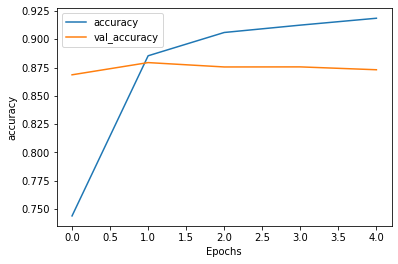

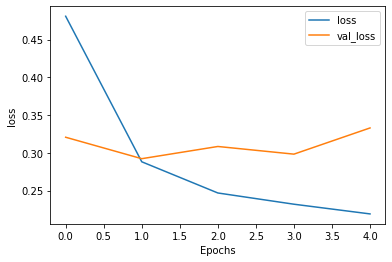

In [0]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

#### **LSTM ANALYSIS**
For all three Models Default Intitialization was used. Andrew Ng's lectures say that an activation layer of zeros should be used for activation 0. For the LSTM Model I used a Vocabulary size of 6000 most frequent words and Max Length Sentence of 180 Words, I also used an Embedding Dimension of 20. My Truncation and Padding were both 'post' type.

For the Model itself I used the Embedding layer and then a Spatial Dropout layer, which I researched on, that because simple Dropouts arent effective with RNNs and LSTMs, you should go for Weight dropping or using a Spatial Dropout Layer after the Embedding layer with a rate of 0.3. Then I used 2 LSTM layers with 64 and 32 cells which I then passed on to my Dense Layer with 20 Nuerons and an activation 'Hyperbolic Tangent (tanh)' which was recommended over 'relu' in Andrew Ng's lectures. Then I finally use a Dense layer with 1 Nueron and activation 'Sigmoid'. I used 2 LSTMS because they give a more stable or smoother loss compared to 1 LSTM.

The Model had 154,857 trainable parameters.

For my loss function I used 'Binary Cross Entropy' which works best with the sigmoid activation, I used the Adam optimizer as it said that SGD RMSprop and Adam are best used for LSTMs and RNNs in research papers. Then I ran this all with a Batch Size of 256 for 5 Epochs where my Val Accuracy shot up to 87% in the start then began to fall. It was first falling at a very fast rate which meant I was overfitting as my Training Accuracy went upto 98%, So I used the Spatial Dropout to regularize finally giving a Stable 87% Validation Accuracy.

### BIDIRECTIONAL LSTM

In [18]:
BDLSTM = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length = max_length),
                             tf.keras.layers.SpatialDropout1D(0.25),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences= True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences= True)),
                             tf.keras.layers.GlobalMaxPool1D(),
                             tf.keras.layers.Dense(16,activation='tanh'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

BDLSTM.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
BDLSTM.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 180, 20)           120000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 180, 20)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 180, 128)          43520     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 180, 64)           41216     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [0]:
history = BDLSTM.fit(training_padded,
          training_labels,
          batch_size = 256,
          epochs = num_epochs,
          validation_data = (testing_padded, testing_labels),
          verbose = 1)

Epoch 1/5
137/137 [==============================] - 29s 214ms/step - loss: 0.4682 - accuracy: 0.7534 - val_loss: 0.2985 - val_accuracy: 0.8780
Epoch 2/5
137/137 [==============================] - 26s 192ms/step - loss: 0.2620 - accuracy: 0.8958 - val_loss: 0.2879 - val_accuracy: 0.8819
Epoch 3/5
137/137 [==============================] - 25s 183ms/step - loss: 0.2246 - accuracy: 0.9132 - val_loss: 0.2882 - val_accuracy: 0.8824
Epoch 4/5
137/137 [==============================] - 23s 169ms/step - loss: 0.1988 - accuracy: 0.9259 - val_loss: 0.3046 - val_accuracy: 0.8754
Epoch 5/5
137/137 [==============================] - 23s 171ms/step - loss: 0.1792 - accuracy: 0.9321 - val_loss: 0.3241 - val_accuracy: 0.8763


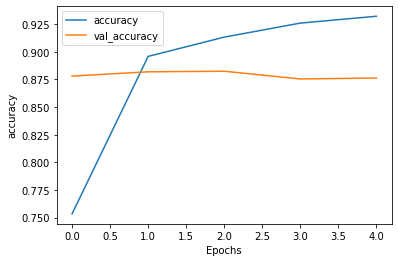

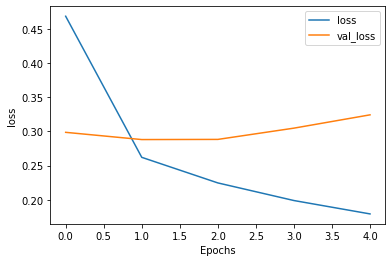

In [0]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

#### **BIDIRECTIONAL LSTM ANALYSIS**
For all three Models Default Intitialization was used. Andrew Ng's lectures say that an activation layer of zeros should be used for activation 0. For the BDLSTM Model I used a Vocabulary size of 6000 most frequent words and Max Length Sentence of 180 Words, I also used an Embedding Dimension of 20. My Truncation and Padding were both 'post' type.

For the Model itself I used the Embedding layer and then a Spatial Dropout layer, which I researched on, that because simple Dropouts arent effective with RNNs and LSTMs, you should go for Weight dropping or using a Spatial Dropout Layer after the Embedding layer with a rate of 0.25. Then I used 2 BIdirectional LSTM layers with 64 and 32 cells, which meant 128  and 64 for both directions which I then passed on to my Global Max Pooling Layer which  Laurence Moroney taught in his lectures was better than Flatten which passed onto a Dense layer with 20 Nuerons and an activation 'Hyperbolic Tangent (tanh)' which was recommended over 'relu' in Andrew Ng's lectures. Then I finally use a Dense layer with 1 Nueron and activation 'Sigmoid'. I used 2 LSTMS because they give a more stable or smoother loss compared to 1 LSTM.

The Model had 205,793 trainable parameters.

For my loss function I used 'Binary Cross Entropy' which works best with the sigmoid activation, I used the Adam optimizer as it said that SGD RMSprop and Adam are best used for LSTMs and RNNs in research papers. Then I ran this all with a Batch Size of 256 for 5 Epochs where my Val Accuracy shot up to 88% in the start then began to fall. It was first falling at a very fast rate which meant I was overfitting as my Training Accuracy went upto 99%, So I used the Spatial Dropout to regularize finally giving a Stable 88% Validation Accuracy.

### LESS THAN 10000 PARAMETERS

In [0]:
# WRITE CODE HERE
vocab_size = 1000
embedding_dim = 8
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [20]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = '<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
len(word_index)

83500

In [0]:
training_labels = Y_train
testing_labels = Y_test

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,maxlen = max_length, padding = padding_type, truncating= trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences,maxlen = max_length, padding = padding_type, truncating= trunc_type)

In [26]:
MODEL10K = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length = max_length),
                             tf.keras.layers.SpatialDropout1D(0.05),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(8,activation='tanh'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

MODEL10K.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
MODEL10K.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 8)            8000      
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 100, 8)            0         
_________________________________________________________________
global_average_pooling1d_3 ( (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 8,081
Trainable params: 8,081
Non-trainable params: 0
_________________________________________________________________


In [27]:
num_epochs = 15
history = MODEL10K.fit(training_padded,
          training_labels,
          batch_size = 256,
          epochs = num_epochs,
          validation_data = (testing_padded, testing_labels),
          verbose = 1)

Epoch 1/15
137/137 [==============================] - 1s 6ms/step - loss: 0.6844 - accuracy: 0.6453 - val_loss: 0.6661 - val_accuracy: 0.7437
Epoch 2/15
137/137 [==============================] - 1s 6ms/step - loss: 0.6224 - accuracy: 0.7575 - val_loss: 0.5665 - val_accuracy: 0.7775
Epoch 3/15
137/137 [==============================] - 1s 6ms/step - loss: 0.5124 - accuracy: 0.7956 - val_loss: 0.4651 - val_accuracy: 0.8111
Epoch 4/15
137/137 [==============================] - 1s 6ms/step - loss: 0.4329 - accuracy: 0.8215 - val_loss: 0.4134 - val_accuracy: 0.8236
Epoch 5/15
137/137 [==============================] - 1s 6ms/step - loss: 0.3947 - accuracy: 0.8315 - val_loss: 0.3908 - val_accuracy: 0.8326
Epoch 6/15
137/137 [==============================] - 1s 6ms/step - loss: 0.3766 - accuracy: 0.8365 - val_loss: 0.3798 - val_accuracy: 0.8366
Epoch 7/15
137/137 [==============================] - 1s 6ms/step - loss: 0.3664 - accuracy: 0.8404 - val_loss: 0.3739 - val_accuracy: 0.8389
Epoch 

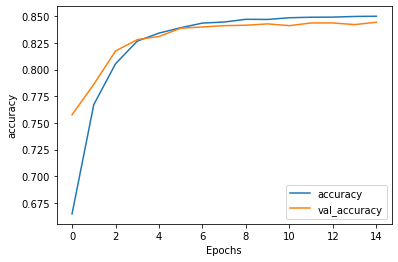

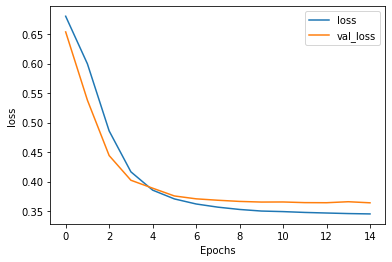

In [0]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

#### **MODEL10K ANALYSIS**
For all three Models Default Intitialization was used. Andrew Ng's lectures say that an activation layer of zeros should be used for activation 0. For the Less than 10K Parameters Model I used a Vocabulary size of 1000 most frequent words and Max Length Sentence of 100 Words, I also used an Embedding Dimension of 8. My Truncation and Padding were both 'post' type.

For the Model itself I used the Embedding layer and then a Spatial Dropout layer, which I researched on, that because simple Dropouts arent effective with RNNs and LSTMs, you should go for Weight dropping or using a Spatial Dropout Layer after the Embedding layer with a rate of 0.05 which went to the Global Max Pooling Layer which  Laurence Moroney taught in his lectures was better than Flatten which I then passed on to my Dense Layer with 8 Nuerons and an activation 'Hyperbolic Tangent (tanh)' which was recommended over 'relu' in Andrew Ng's lectures. Then I finally use a Dense layer with 1 Nueron and activation 'Sigmoid'. 

The Model had **8081** trainable parameters only.

For my loss function I used 'Binary Cross Entropy' which works best with the sigmoid activation, I used the Adam optimizer as it said that SGD RMSprop and Adam are best used for LSTMs and RNNs in research papers. Then I ran this all with a Batch Size of 256 for 15 Epochs where my Val Accuracy rose up to 84% gradually in the start and remained steady at that Validation Accuracy

In [0]:
BASE_DIR = "/content/drive/My Drive/Colab Notebooks/Deep Learning/Models/"
# LSTM.save_weights(BASE_DIR + 'LSTM_Model' + '.hdf5')
# BDLSTM.save_weights(BASE_DIR + 'BDLSTM_Model' + '.hdf5')
# MODEL10K.save_weights(BASE_DIR + '10K_Model' + '.hdf5')

LSTM.load_weights(BASE_DIR + 'LSTM_Model' + '.hdf5')
BDLSTM.load_weights(BASE_DIR + 'BDLSTM_Model' + '.hdf5')
MODEL10K.load_weights(BASE_DIR + '10K_Model' + '.hdf5')

### Model Predictions. For your best performing model

Come up with ten sample sentences NOT part of the original data set. 
Use model.predict() to generate predictions and report positive or negative sentiment.

In [0]:
reviews = [
  " Beastie Boys Story is a great film; often hilarious but doesn't shy away from the emotion either. It feels alive, unpredictable, and cathartic", 
  " To Kill a Mockingbird is an absolute classic and speaks a lot for what went down during its period it takes place. The performances are great and you learn some things from",
  " The Midnight Gospel cuts into viewer psyche with what feels like immense precision. In nearly every scene, I found some visual I enjoyed, one sentence I related to, or a feeling I thought only I'd had - no matter how overwhelmed I became",
  " While the combination of creative talent behind the scenes is a winner, this new series is likely only going to appeal to the Adult Swim crowd. Your mile(high)age may vary",
  " It's lovely to see Indian characters front and centre and comfortable in their desi identity. It's even more wonderful when the writing is so warm...",
  " A topnotch adaptation of a timeless literary classic. The courtroom scene was outstanding. It seemed that the content of the book was magically transformed into",
  " By the time this 'Fantasy Island' arrives at its gallingly stupid final twist, you'll be dying to go home.",
  " The plot is risible. The action worse. The wait for lady Bond continues. Everything that happens in the script is more ridiculous than the previous one.",
  " As viewers of this dreck, we could teach the earth's crust a few things about being deeply bored.",
  " A charmless idiot, a clumsy rip-off of Jackass and one more tiresome exercise in arrested adolescence -- add them up and you have Hot Rod."
]

In [0]:
labels = [1,1,1,1,1,1,0,0,0,0]

In [0]:
assert len(reviews) == len(labels)

In [43]:
# WRITE CODE HERE

test_data = []
for i in range(len(reviews)):
  text = re.sub(r'\b\w{1,3}\b', '', reviews[i])
  words = (re.sub('[^A-Za-z\s]+',' ', text)).lower().split()
  sentence = ""
  for w in words:
    if w in stop_words:
      continue
    else:
      sentence += w + ' '
  test_data.append(sentence)
test_data

['beastie boys story great film often hilarious away emotion either feels alive unpredictable cathartic ',
 'kill mockingbird absolute classic speaks went period takes place performances great learn things ',
 'midnight gospel cuts viewer psyche feels like immense precision nearly every scene found visual enjoyed sentence related feeling thought matter overwhelmed became ',
 'combination creative talent behind scenes winner series likely going appeal adult swim crowd mile high vary ',
 'lovely indian characters front centre comfortable desi identity even wonderful writing warm ',
 'topnotch adaptation timeless literary classic courtroom scene outstanding seemed content book magically transformed ',
 'time fantasy island arrives gallingly stupid final twist dying home ',
 'plot risible action worse wait lady bond continues everything happens script ridiculous previous ',
 'viewers dreck could teach earth crust things deeply bored ',
 'charmless idiot clumsy jackass tiresome exercise arr

In [0]:
max_length = 180
test_seq = tokenizer.texts_to_sequences(test_data)
padded = pad_sequences(test_seq ,maxlen = max_length, padding = padding_type, truncating= trunc_type)

In [60]:
LSTM_Labels = np.where( LSTM.predict(padded) > 0.5, 1, 0).reshape(-1)
LSTM_Labels

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [61]:
BDLSTM_Labels = np.where( BDLSTM.predict(padded) > 0.4, 1, 0).reshape(-1)
BDLSTM_Labels

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [0]:
max_length = 100
test_seq = tokenizer.texts_to_sequences(test_data)
padded = pad_sequences(test_seq ,maxlen = max_length, padding = padding_type, truncating= trunc_type)

In [62]:
MODEL10K_Labels = np.where( MODEL10K.predict(padded) > 0.4, 1, 0).reshape(-1)
MODEL10K_Labels

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [0]:
def confusionMatrix(Y_Pred, Y_Test):
    Y_A = pd.Series(Y_Test, name='Actual')
    Y_P = pd.Series(Y_Pred, name='Predicted')
    df_confusion = pd.crosstab(Y_P, Y_A, margins=True)
    display(df_confusion)
    return df_confusion

## LSTM

In [66]:
x = confusionMatrix(LSTM_Labels, labels)

Actual,0,1,All
Predicted,,,
0,3,1,4
1,1,5,6
All,4,6,10


### BIDIRECTIONAL LSTM

In [68]:
x = confusionMatrix(BDLSTM_Labels, labels)

Actual,0,1,All
Predicted,,,
0,4,2,6
1,0,4,4
All,4,6,10


### MODEL 10K PARAMETERS

In [69]:
x = confusionMatrix(MODEL10K_Labels, labels)

Actual,0,1,All
Predicted,,,
0,4,2,6
1,0,4,4
All,4,6,10


### Prediction Analysis
I used real movie reviews posted on Rotten TOmatoes for my prediction Analysis, where I used 10 relatively small reviews which may have brought some bias, but the results arent all bad as can be seen in the Confusion Matrices above where 1s indicate Positive Sentiment and 0s indicate negative